# MARATONA BEHIND THE CODE 2020

## DESAFIO 6 - LIT
- Autor: Rodrigo Lima

# Parte 1. Importando os pacotes

In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import datetime as dt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score

import warnings
warnings.filterwarnings("ignore")

# Parte 2. Carregando os Dados

In [2]:
# Carregando o dataset da competição
treino = pd.read_csv('../data/training_dataset.csv')
teste  = pd.read_csv('../data/to_be_scored.csv')

# Parte 3. Feature Engineering

In [3]:
# Funcao para verificar valores missing no dataset
def check_missing(df, display = 10):
    temp_df = df.copy()
    df_nan = (temp_df.isnull().sum() / len(temp_df)) * 100
    missing_data = pd.DataFrame({'Missing n': temp_df.isnull().sum(),'% Missing' :df_nan})
    if missing_data['Missing n'].sum() == 0:
        return print('Ótimo! Não há mais valores faltantes neste dataset.')
    else:
        return missing_data.sort_values('% Missing', ascending = False).head(display)

# Funcao para preencher os dados missing de algumas colunas
def preenche_missing(df):
    
    # Remove todos os registros que tem algum dado vazio de algumas colunas
    df.dropna(axis='index', how='any', subset=['certificados', 'total_modulos'], inplace=True)

    # coloca constante 0 em outras colunas com dados missing
    impute_zeros = SimpleImputer(
                                    missing_values=np.nan,
                                    strategy='constant',
                                    fill_value=0,
                                    verbose=0,
                                    copy=True
                                )
    
    impute_zeros.fit(X=df)

    # Reconstruindo um Pandas DataFrame com os resultados
    df = pd.DataFrame.from_records(
            data = impute_zeros.transform(
            X    = df
        ),
        columns=df.columns
    )    

    return df

# Funcao para trabalhar as features
def fe(df):

    # Removendo colunas unicas
    df = df.drop(['id', 'graduacao', 'universidade', 'organizacao', 'como_conheceu_lit'], axis = 1)

    return df

# Funcao para transformar features categoricas em numericas
def fe_cat_num(df):

    # Tratando variáveis categóricas com o método Pandas ``get_dummies()''
    df = pd.get_dummies(df, columns=['profissao'])

    return df

In [4]:
# Feature Engineering
treino = preenche_missing(treino)    
treino = fe(treino)   
treino = fe_cat_num(treino)    

# Verificando as colunas com dados missing do dataset
check_missing(treino, display = 15)

print(treino.shape)
treino.head(10)

Ótimo! Não há mais valores faltantes neste dataset.
(12329, 22)


,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,total_modulos,modulos_iniciados,modulos_finalizados,certificados,categoria,profissao_0,...,profissao_Analista Senior,profissao_Assessor,profissao_Coordenador,profissao_Diretor,profissao_Engenheiro,profissao_Gerente,profissao_Outros,profissao_SEM EXPERIÊNCIA,profissao_Supervisor,profissao_Sócio/Dono/Proprietário
0,1.0,1.0,1.0,6.0,28.0,5.0,4.0,0.0,perfil6,0,...,1,0,0,0,0,0,0,0,0,0
1,0.0,0.0,1.0,6.0,66.0,36.0,34.0,0.0,perfil2,0,...,0,0,0,0,0,0,0,0,1,0
2,1.0,1.0,1.0,10.0,27.0,27.0,27.0,0.0,perfil2,0,...,0,0,0,0,0,0,1,0,0,0
3,0.0,1.0,1.0,5.0,29.0,10.0,6.0,0.0,perfil5,0,...,0,0,0,0,0,0,1,0,0,0
4,0.0,0.0,1.0,7.0,67.0,49.0,44.0,0.0,perfil2,0,...,0,0,0,0,0,0,0,1,0,0
5,1.0,1.0,1.0,0.0,66.0,52.0,50.0,0.0,perfil2,0,...,0,0,0,0,0,0,0,0,0,0
6,0.0,0.0,0.0,2.0,31.0,0.0,13.0,0.0,perfil4,0,...,0,1,0,0,0,0,0,0,0,0
7,0.0,0.0,0.0,6.0,27.0,13.0,12.0,0.0,perfil2,0,...,0,0,0,0,0,0,0,0,0,0
8,0.0,0.0,1.0,3.0,131.0,38.0,20.0,0.0,perfil3,0,...,0,0,0,0,1,0,0,0,0,0
9,0.0,0.0,1.0,9.0,51.0,49.0,49.0,0.0,perfil2,0,...,0,0,0,0,0,1,0,0,0,0


In [5]:
# Feature Engineering
teste = preenche_missing(teste)    
teste = fe(teste)   
teste = fe_cat_num(teste)    
teste['profissao_0'] = 0

# Verificando as colunas com dados missing do dataset
check_missing(teste, display = 15)

print(teste.shape)
teste.head(10)

Ótimo! Não há mais valores faltantes neste dataset.
(1000, 21)


,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,total_modulos,modulos_iniciados,modulos_finalizados,certificados,profissao_Advogado,profissao_Analista,...,profissao_Assessor,profissao_Coordenador,profissao_Diretor,profissao_Engenheiro,profissao_Gerente,profissao_Outros,profissao_SEM EXPERIÊNCIA,profissao_Supervisor,profissao_Sócio/Dono/Proprietário,profissao_0
0,0,0,1,3,58,3,2,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,1,1,7,62,19,17,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,9,36,3,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,1,1,9,145,61,54,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,8,33,33,29,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,0,0,1,3,29,13,11,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,0,0,1,8,521,190,160,1,0,0,...,0,0,0,0,0,0,1,0,0,0
7,0,0,1,4,10,10,10,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,0,0,1,10,27,22,17,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,1,1,1,7,10,8,6,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# Parte 4. Machine Learning

In [6]:
treino.columns

Index(['pretende_fazer_cursos_lit', 'interesse_mba_lit',
       'importante_ter_certificado', 'horas_semanais_estudo', 'total_modulos',
       'modulos_iniciados', 'modulos_finalizados', 'certificados', 'categoria',
       'profissao_0', 'profissao_Advogado', 'profissao_Analista',
       'profissao_Analista Senior', 'profissao_Assessor',
       'profissao_Coordenador', 'profissao_Diretor', 'profissao_Engenheiro',
       'profissao_Gerente', 'profissao_Outros', 'profissao_SEM EXPERIÊNCIA',
       'profissao_Supervisor', 'profissao_Sócio/Dono/Proprietário'],
      dtype='object')

In [7]:
features = ['pretende_fazer_cursos_lit', 'interesse_mba_lit',
            'importante_ter_certificado', 'horas_semanais_estudo', 'total_modulos',
            'modulos_iniciados', 'modulos_finalizados', 'certificados',
            'profissao_0', 'profissao_Advogado', 'profissao_Analista',
            'profissao_Analista Senior', 'profissao_Assessor',
            'profissao_Coordenador', 'profissao_Diretor', 'profissao_Engenheiro',
            'profissao_Gerente', 'profissao_Outros', 'profissao_SEM EXPERIÊNCIA',
            'profissao_Supervisor', 'profissao_Sócio/Dono/Proprietário']

target = 'categoria'

In [8]:
# Separando features e target
X = treino[features]
y = treino[target]

# Split dos dados em treino e validacao
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=133)

# Treinamento com GradientBoosting
model = GradientBoostingClassifier().fit(X_train, y_train)

# Validacao do modelo
y_pred_val = model.predict(X_valid)

# Matriz de Classificacao
print(classification_report(y_valid, y_pred_val))

# Avaliacao da metrica F1
print('F1_macro   : ', f1_score(y_valid, y_pred_val, average='macro'))
print('F1_micro   : ', f1_score(y_valid, y_pred_val, average='micro'))
print('F1_weighted: ', f1_score(y_valid, y_pred_val, average='weighted'))
print('F1_none    : ', f1_score(y_valid, y_pred_val, average=None))

              precision    recall  f1-score   support

     perfil1       0.83      0.80      0.82       391
     perfil2       0.83      0.86      0.84       667
     perfil3       0.83      0.72      0.77       181
     perfil4       0.74      0.75      0.75       250
     perfil5       0.80      0.79      0.80       299
     perfil6       0.82      0.83      0.83       678

    accuracy                           0.81      2466
   macro avg       0.81      0.79      0.80      2466
weighted avg       0.81      0.81      0.81      2466

F1_macro   :  0.7996411803358715
F1_micro   :  0.813463098134631
F1_weighted:  0.8130966722632058
F1_none    :  [0.81510417 0.84202792 0.77286136 0.74501992 0.79595278 0.82688093]


In [9]:
model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [11]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

                                   importance
modulos_finalizados                  0.601769
certificados                         0.288031
modulos_iniciados                    0.088064
total_modulos                        0.013699
horas_semanais_estudo                0.002916
profissao_0                          0.000524
profissao_Sócio/Dono/Proprietário    0.000507
profissao_Engenheiro                 0.000493
profissao_Gerente                    0.000493
profissao_Coordenador                0.000471
profissao_Advogado                   0.000410
interesse_mba_lit                    0.000395
profissao_Analista                   0.000317
profissao_Assessor                   0.000312
importante_ter_certificado           0.000282
profissao_Supervisor                 0.000268
profissao_Outros                     0.000255
profissao_Diretor                    0.000248
pretende_fazer_cursos_lit            0.000239
profissao_Analista Senior            0.000188
profissao_SEM EXPERIÊNCIA         

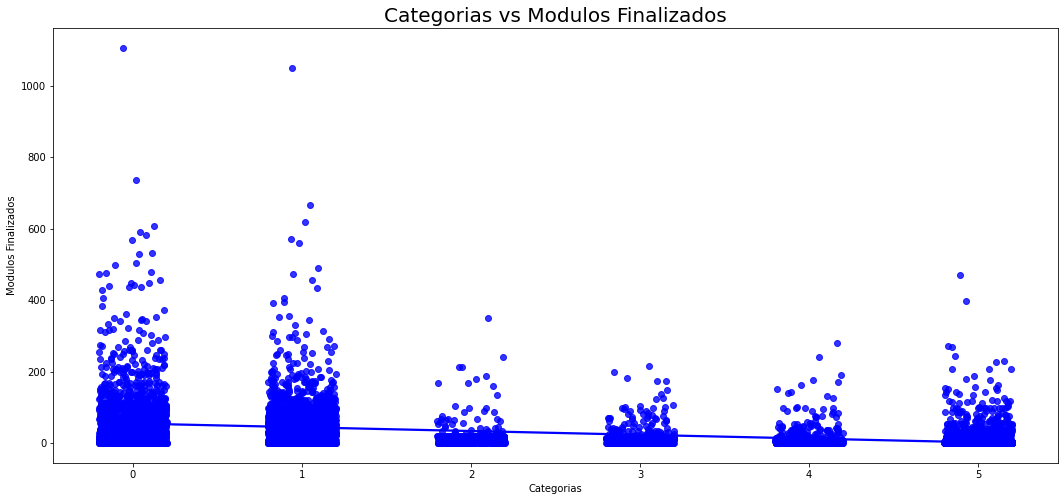

In [12]:
import seaborn as sns

plot_treino = treino.copy()

# Categorizar a coluna target
plot_treino['categoria'] = plot_treino['categoria'].astype("category").cat.codes

# Visualiza um gráfico entre as variaveis alcohol e quality e verificar se existe alguma correlação linear
plt.figure(figsize=(18, 8))
sns.regplot(y='modulos_finalizados', x='categoria', data=plot_treino, color='b', x_jitter=0.2)
plt.xlabel('Categorias')
plt.ylabel('Modulos Finalizados')
plt.title('Categorias vs Modulos Finalizados', fontsize=20)
plt.show();

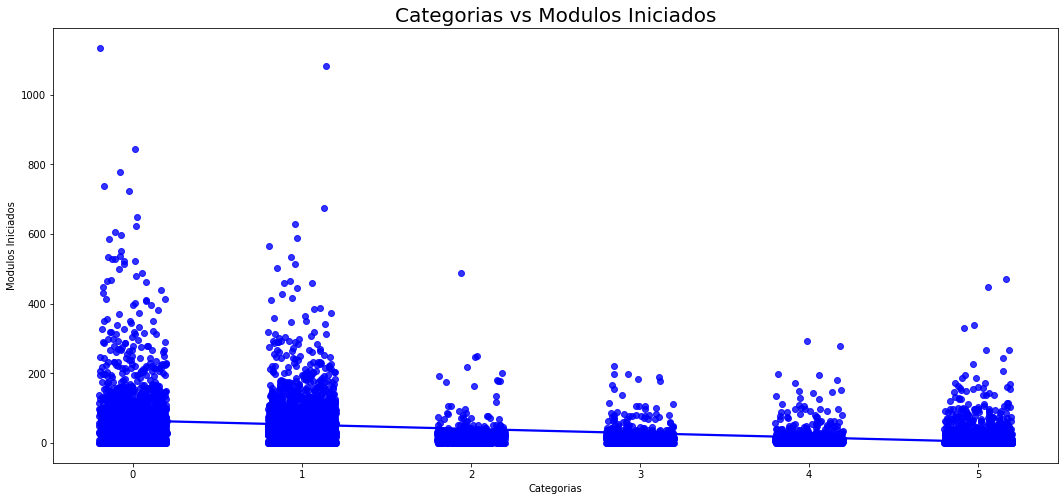

In [14]:
import seaborn as sns

plot_treino = treino.copy()

# Categorizar a coluna target
plot_treino['categoria'] = plot_treino['categoria'].astype("category").cat.codes

# Visualiza um gráfico entre as variaveis alcohol e quality e verificar se existe alguma correlação linear
plt.figure(figsize=(18, 8))
sns.regplot(y='modulos_iniciados', x='categoria', data=plot_treino, color='b', x_jitter=0.2)
plt.xlabel('Categorias')
plt.ylabel('Modulos Iniciados')
plt.title('Categorias vs Modulos Iniciados', fontsize=20)
plt.show();

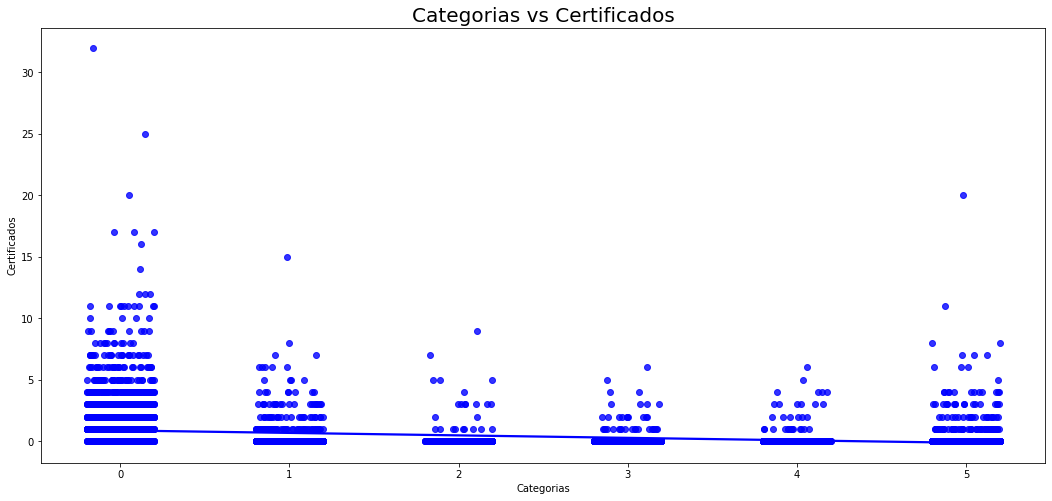

In [15]:
import seaborn as sns

plot_treino = treino.copy()

# Categorizar a coluna target
plot_treino['categoria'] = plot_treino['categoria'].astype("category").cat.codes

# Visualiza um gráfico entre as variaveis alcohol e quality e verificar se existe alguma correlação linear
plt.figure(figsize=(18, 8))
sns.regplot(y='certificados', x='categoria', data=plot_treino, color='b', x_jitter=0.2)
plt.xlabel('Categorias')
plt.ylabel('Certificados')
plt.title('Categorias vs Certificados', fontsize=20)
plt.show();

In [16]:
# Carregando o dataset da competição
treino = pd.read_csv('../data/training_dataset.csv')

# Feature Engineering
treino = preenche_missing(treino)    
treino = fe(treino)   
treino = fe_cat_num(treino)    

# Separando features e target
X = treino[features]
y = treino[target]

# Split dos dados em treino e validacao
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=133)

# Treinamento com GradientBoosting
param = {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}

model_v2 = GradientBoostingClassifier(**param).fit(X_train, y_train)

# Validacao do modelo
y_pred_val = model_v2.predict(X_valid)

# Matriz de Classificacao
print(classification_report(y_valid, y_pred_val))

# Avaliacao da metrica F1
print('F1_macro   : ', f1_score(y_valid, y_pred_val, average='macro'))
print('F1_micro   : ', f1_score(y_valid, y_pred_val, average='micro'))
print('F1_weighted: ', f1_score(y_valid, y_pred_val, average='weighted'))
print('F1_none    : ', f1_score(y_valid, y_pred_val, average=None))

              precision    recall  f1-score   support

     perfil1       0.83      0.81      0.82       391
     perfil2       0.83      0.86      0.84       667
     perfil3       0.83      0.73      0.78       181
     perfil4       0.75      0.75      0.75       250
     perfil5       0.80      0.79      0.80       299
     perfil6       0.82      0.84      0.83       678

    accuracy                           0.82      2466
   macro avg       0.81      0.79      0.80      2466
weighted avg       0.82      0.82      0.82      2466

F1_macro   :  0.801736447726166
F1_micro   :  0.8154906731549066
F1_weighted:  0.8151316111552043
F1_none    :  [0.81971466 0.84326711 0.77647059 0.74650699 0.79526227 0.82919708]


In [17]:
# Carregando o dataset da competição
treino = pd.read_csv('../data/training_dataset.csv')

# Feature Engineering
treino = preenche_missing(treino)    
treino = fe(treino)   
treino = fe_cat_num(treino)    

treino = treino[treino['modulos_finalizados'] <= 400]

# Separando features e target
X = treino[features]
y = treino[target]

# Split dos dados em treino e validacao
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=133)

# Treinamento com GradientBoosting
param = {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}

model_v3 = GradientBoostingClassifier(**param).fit(X_train, y_train)

# Validacao do modelo
y_pred_val = model_v3.predict(X_valid)

# Matriz de Classificacao
print(classification_report(y_valid, y_pred_val))

# Avaliacao da metrica F1
print('F1_macro   : ', f1_score(y_valid, y_pred_val, average='macro'))
print('F1_micro   : ', f1_score(y_valid, y_pred_val, average='micro'))
print('F1_weighted: ', f1_score(y_valid, y_pred_val, average='weighted'))
print('F1_none    : ', f1_score(y_valid, y_pred_val, average=None))

              precision    recall  f1-score   support

     perfil1       0.84      0.83      0.83       367
     perfil2       0.83      0.81      0.82       602
     perfil3       0.82      0.76      0.79       169
     perfil4       0.78      0.79      0.79       273
     perfil5       0.82      0.82      0.82       320
     perfil6       0.83      0.87      0.85       729

    accuracy                           0.83      2460
   macro avg       0.82      0.81      0.82      2460
weighted avg       0.83      0.83      0.83      2460

F1_macro   :  0.8174394702645059
F1_micro   :  0.8260162601626017
F1_weighted:  0.8257969368690661
F1_none    :  [0.83287671 0.81994928 0.79141104 0.78623188 0.82316119 0.85100671]


In [18]:
# Carregando o dataset da competição
treino = pd.read_csv('../data/training_dataset.csv')

# Feature Engineering
treino = preenche_missing(treino)    
treino = fe(treino)   
treino = fe_cat_num(treino)    

treino = treino[treino['modulos_finalizados'] <= 500]

# Separando features e target
X = treino[features]
y = treino[target]

# Split dos dados em treino e validacao
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=133)

# Treinamento com GradientBoosting
param = {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}

model_v4 = GradientBoostingClassifier(**param).fit(X_train, y_train)

# Validacao do modelo
y_pred_val = model_v4.predict(X_valid)

# Matriz de Classificacao
print(classification_report(y_valid, y_pred_val))

# Avaliacao da metrica F1
print('F1_macro   : ', f1_score(y_valid, y_pred_val, average='macro'))
print('F1_micro   : ', f1_score(y_valid, y_pred_val, average='micro'))
print('F1_weighted: ', f1_score(y_valid, y_pred_val, average='weighted'))
print('F1_none    : ', f1_score(y_valid, y_pred_val, average=None))

              precision    recall  f1-score   support

     perfil1       0.85      0.81      0.83       406
     perfil2       0.83      0.85      0.84       650
     perfil3       0.81      0.71      0.76       156
     perfil4       0.80      0.78      0.79       265
     perfil5       0.83      0.85      0.84       288
     perfil6       0.84      0.87      0.85       698

    accuracy                           0.83      2463
   macro avg       0.83      0.81      0.82      2463
weighted avg       0.83      0.83      0.83      2463

F1_macro   :  0.818293470859962
F1_micro   :  0.8319123020706456
F1_weighted:  0.831440463096592
F1_none    :  [0.82619647 0.841306   0.75767918 0.79238095 0.83848797 0.85371025]


In [19]:
# Carregando o dataset da competição
treino = pd.read_csv('../data/training_dataset.csv')

# Feature Engineering
treino = preenche_missing(treino)    
treino = fe(treino)   
treino = fe_cat_num(treino)    

treino = treino[treino['modulos_finalizados'] <= 600]

# Separando features e target
X = treino[features]
y = treino[target]

# Split dos dados em treino e validacao
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=133)

# Treinamento com GradientBoosting
param = {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}

model_v5 = GradientBoostingClassifier(**param).fit(X_train, y_train)

# Validacao do modelo
y_pred_val = model_v5.predict(X_valid)

# Matriz de Classificacao
print(classification_report(y_valid, y_pred_val))

# Avaliacao da metrica F1
print('F1_macro   : ', f1_score(y_valid, y_pred_val, average='macro'))
print('F1_micro   : ', f1_score(y_valid, y_pred_val, average='micro'))
print('F1_weighted: ', f1_score(y_valid, y_pred_val, average='weighted'))
print('F1_none    : ', f1_score(y_valid, y_pred_val, average=None))

              precision    recall  f1-score   support

     perfil1       0.84      0.83      0.84       389
     perfil2       0.84      0.83      0.84       647
     perfil3       0.82      0.71      0.76       173
     perfil4       0.72      0.78      0.75       246
     perfil5       0.79      0.79      0.79       312
     perfil6       0.83      0.85      0.84       698

    accuracy                           0.82      2465
   macro avg       0.81      0.80      0.80      2465
weighted avg       0.82      0.82      0.82      2465

F1_macro   :  0.8021516737788835
F1_micro   :  0.8174442190669371
F1_weighted:  0.8173891171523598
F1_none    :  [0.8372093  0.8355417  0.76160991 0.74901961 0.78972713 0.8398024 ]


In [20]:
# Carregando o dataset da competição
treino = pd.read_csv('../data/training_dataset.csv')

# Feature Engineering
treino = preenche_missing(treino)    
treino = fe(treino)   
treino = fe_cat_num(treino)    

treino = treino[treino['modulos_finalizados'] <= 450]

# Separando features e target
X = treino[features]
y = treino[target]

# Split dos dados em treino e validacao
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=133)

# Treinamento com GradientBoosting
param = {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}

model_v6 = GradientBoostingClassifier(**param).fit(X_train, y_train)

# Validacao do modelo
y_pred_val = model_v6.predict(X_valid)

# Matriz de Classificacao
print(classification_report(y_valid, y_pred_val))

# Avaliacao da metrica F1
print('F1_macro   : ', f1_score(y_valid, y_pred_val, average='macro'))
print('F1_micro   : ', f1_score(y_valid, y_pred_val, average='micro'))
print('F1_weighted: ', f1_score(y_valid, y_pred_val, average='weighted'))
print('F1_none    : ', f1_score(y_valid, y_pred_val, average=None))

              precision    recall  f1-score   support

     perfil1       0.84      0.83      0.83       406
     perfil2       0.83      0.83      0.83       631
     perfil3       0.79      0.77      0.78       160
     perfil4       0.77      0.81      0.79       247
     perfil5       0.79      0.80      0.79       299
     perfil6       0.86      0.85      0.85       719

    accuracy                           0.83      2462
   macro avg       0.81      0.81      0.81      2462
weighted avg       0.83      0.83      0.83      2462

F1_macro   :  0.8132765372249757
F1_micro   :  0.8257514216084484
F1_weighted:  0.82591188038126
F1_none    :  [0.83126551 0.83147854 0.77848101 0.78978389 0.79470199 0.85394829]


In [30]:
# Carregando o dataset da competição
treino = pd.read_csv('../data/training_dataset.csv')

# Feature Engineering
treino = preenche_missing(treino)    
treino = fe(treino)   
treino = fe_cat_num(treino)    

treino = treino[treino['modulos_finalizados'] <= 500]
treino = treino[treino['certificados'] <= 15]

# Separando features e target
X = treino[features]
y = treino[target]

# Split dos dados em treino e validacao
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=133)

# Treinamento com GradientBoosting
param = {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}

model_v7 = GradientBoostingClassifier(**param).fit(X_train, y_train)

# Validacao do modelo
y_pred_val = model_v7.predict(X_valid)

# Matriz de Classificacao
print(classification_report(y_valid, y_pred_val))

# Avaliacao da metrica F1
print('F1_macro   : ', f1_score(y_valid, y_pred_val, average='macro'))
print('F1_micro   : ', f1_score(y_valid, y_pred_val, average='micro'))
print('F1_weighted: ', f1_score(y_valid, y_pred_val, average='weighted'))
print('F1_none    : ', f1_score(y_valid, y_pred_val, average=None))

              precision    recall  f1-score   support

     perfil1       0.84      0.82      0.83       369
     perfil2       0.78      0.84      0.81       664
     perfil3       0.83      0.70      0.76       171
     perfil4       0.79      0.69      0.74       258
     perfil5       0.85      0.80      0.83       302
     perfil6       0.79      0.84      0.81       699

    accuracy                           0.81      2463
   macro avg       0.81      0.78      0.80      2463
weighted avg       0.81      0.81      0.80      2463

F1_macro   :  0.7959215168367372
F1_micro   :  0.8055217214778725
F1_weighted:  0.8048619376605792
F1_none    :  [0.83241758 0.80872727 0.75796178 0.73662551 0.82534247 0.81445448]


In [22]:
# Carregando o dataset da competição
treino = pd.read_csv('../data/training_dataset.csv')

# Feature Engineering
treino = preenche_missing(treino)    
treino = fe(treino)   
treino = fe_cat_num(treino)    

treino = treino[treino['modulos_finalizados'] <= 500]
treino = treino[treino['certificados'] <= 15]


features = ['pretende_fazer_cursos_lit', 'interesse_mba_lit',
            'importante_ter_certificado', 'horas_semanais_estudo', 'total_modulos',
            'modulos_finalizados', 'certificados',
            'profissao_0', 'profissao_Advogado', 'profissao_Analista',
            'profissao_Analista Senior', 'profissao_Assessor',
            'profissao_Coordenador', 'profissao_Diretor', 'profissao_Engenheiro',
            'profissao_Gerente', 'profissao_Outros', 'profissao_SEM EXPERIÊNCIA',
            'profissao_Supervisor', 'profissao_Sócio/Dono/Proprietário']


# Separando features e target
X = treino[features]
y = treino[target]

# Split dos dados em treino e validacao
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=133)

# Treinamento com GradientBoosting
param = {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}

model_v8 = GradientBoostingClassifier(**param).fit(X_train, y_train)

# Validacao do modelo
y_pred_val = model_v8.predict(X_valid)

# Matriz de Classificacao
print(classification_report(y_valid, y_pred_val))

# Avaliacao da metrica F1
print('F1_macro   : ', f1_score(y_valid, y_pred_val, average='macro'))
print('F1_micro   : ', f1_score(y_valid, y_pred_val, average='micro'))
print('F1_weighted: ', f1_score(y_valid, y_pred_val, average='weighted'))
print('F1_none    : ', f1_score(y_valid, y_pred_val, average=None))

              precision    recall  f1-score   support

     perfil1       0.82      0.77      0.79       403
     perfil2       0.77      0.80      0.78       640
     perfil3       0.80      0.72      0.76       180
     perfil4       0.79      0.72      0.75       252
     perfil5       0.81      0.77      0.79       284
     perfil6       0.78      0.84      0.81       703

    accuracy                           0.79      2462
   macro avg       0.79      0.77      0.78      2462
weighted avg       0.79      0.79      0.79      2462

F1_macro   :  0.7807106173720344
F1_micro   :  0.7883834281072299
F1_weighted:  0.7879525673919549
F1_none    :  [0.79487179 0.78473282 0.75659824 0.75259875 0.78776978 0.80769231]


In [23]:
# Carregando o dataset da competição
treino = pd.read_csv('../data/training_dataset.csv')

# Feature Engineering
treino = preenche_missing(treino)    
treino = fe(treino)   
treino = fe_cat_num(treino)    

treino = treino[treino['modulos_finalizados'] <= 500]
#treino = treino[treino['certificados'] <= 15]

features = ['pretende_fazer_cursos_lit', 'interesse_mba_lit',
            'importante_ter_certificado', 'horas_semanais_estudo', 'total_modulos',
            'modulos_finalizados', 'certificados',
            'profissao_0', 'profissao_Advogado', 'profissao_Analista',
            'profissao_Analista Senior', 'profissao_Assessor',
            'profissao_Coordenador', 'profissao_Diretor', 'profissao_Engenheiro',
            'profissao_Gerente', 'profissao_Outros', 'profissao_SEM EXPERIÊNCIA',
            'profissao_Supervisor', 'profissao_Sócio/Dono/Proprietário']


# Separando features e target
X = treino[features]
y = treino[target]

# Split dos dados em treino e validacao
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=133)

# Treinamento com GradientBoosting
param = {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}

model_v9 = GradientBoostingClassifier(**param).fit(X_train, y_train)

# Validacao do modelo
y_pred_val = model_v9.predict(X_valid)

# Matriz de Classificacao
print(classification_report(y_valid, y_pred_val))

# Avaliacao da metrica F1
print('F1_macro   : ', f1_score(y_valid, y_pred_val, average='macro'))
print('F1_micro   : ', f1_score(y_valid, y_pred_val, average='micro'))
print('F1_weighted: ', f1_score(y_valid, y_pred_val, average='weighted'))
print('F1_none    : ', f1_score(y_valid, y_pred_val, average=None))

              precision    recall  f1-score   support

     perfil1       0.85      0.81      0.83       406
     perfil2       0.79      0.84      0.82       650
     perfil3       0.83      0.70      0.76       156
     perfil4       0.82      0.73      0.77       265
     perfil5       0.86      0.80      0.83       288
     perfil6       0.79      0.85      0.82       698

    accuracy                           0.81      2463
   macro avg       0.82      0.79      0.80      2463
weighted avg       0.81      0.81      0.81      2463

F1_macro   :  0.803810597539809
F1_micro   :  0.8132358911896062
F1_weighted:  0.8127045191574993
F1_none    :  [0.82619647 0.81702763 0.75694444 0.7744511  0.82585278 0.82239115]


In [32]:
# Carregando o dataset da competição
treino = pd.read_csv('../data/training_dataset.csv')

# Feature Engineering
treino = preenche_missing(treino)    
treino = fe(treino)   
treino = fe_cat_num(treino)    

treino = treino[treino['modulos_finalizados'] <= 500]
treino = treino[treino['modulos_iniciados'] <= 1000]

# Separando features e target
X = treino[features]
y = treino[target]

# Split dos dados em treino e validacao
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=133)

# Treinamento com GradientBoosting
param = {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}

model_v10 = GradientBoostingClassifier(**param).fit(X_train, y_train)

# Validacao do modelo
y_pred_val = model_v10.predict(X_valid)

# Matriz de Classificacao
print(classification_report(y_valid, y_pred_val))

# Avaliacao da metrica F1
print('F1_macro   : ', f1_score(y_valid, y_pred_val, average='macro'))
print('F1_micro   : ', f1_score(y_valid, y_pred_val, average='micro'))
print('F1_weighted: ', f1_score(y_valid, y_pred_val, average='weighted'))
print('F1_none    : ', f1_score(y_valid, y_pred_val, average=None))

              precision    recall  f1-score   support

     perfil1       0.85      0.81      0.83       406
     perfil2       0.79      0.84      0.82       650
     perfil3       0.83      0.70      0.76       156
     perfil4       0.82      0.73      0.77       265
     perfil5       0.86      0.80      0.83       288
     perfil6       0.79      0.85      0.82       698

    accuracy                           0.81      2463
   macro avg       0.82      0.79      0.80      2463
weighted avg       0.81      0.81      0.81      2463

F1_macro   :  0.803810597539809
F1_micro   :  0.8132358911896062
F1_weighted:  0.8127045191574993
F1_none    :  [0.82619647 0.81702763 0.75694444 0.7744511  0.82585278 0.82239115]


# Parte 5. Realizando novas previsões

In [ ]:
sub = teste.copy()

# Realizando previsoes com dados de teste
y_pred_test = model.predict(sub)

# Salvando na coluna target
sub['target'] = y_pred_test

# Visualizando os ultimos registros
sub.tail()

In [ ]:
# Visualizando a distribuicao dos targets
sub['target'].value_counts()

In [ ]:
# Gravando resultado em csv
#sub.to_csv('../submission/results_v4.csv',index=False)

In [ ]:
# Carregando submissoes anteriores
versao_1 = pd.read_csv('../submission/results_v1.csv') # 5 estrelas, posicao 12
versao_3 = pd.read_csv('../submission/results_v3.csv')

In [ ]:
versao_1['target'].value_counts()

In [ ]:
versao_3['target'].value_counts() # 3 estrelas usando cross-validation